<a href="https://colab.research.google.com/github/Blinova-Olga/intelligent-systems-HW1/blob/main/Pandas%26DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#### Загрузить данные в pandas по url=https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

#### 1. Вывести: кол-во наблюдений в датасете
#### 2. Вывести названия столбцов
#### 3. Определить самую частую позицию (item) в заказе 
#### 4. Построить гистрограмму частоты заказов по позициям (item )
#### 5. Измените тип переменной item_price c с помощью лямбды функции
#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)
#### 7. Средняя сумма заказа? (минимум 2 способа)
#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.
#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.
#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.
#### 12. Определить цену по каждой позиции в отдельности. 


In [4]:
nt = pd.read_table('chipotle.tsv')
df = pd.DataFrame(nt)

Необходимо преобразовать данные отделить позиции содержащие "and". \
Так как придется пересчитывать цены для второй позиции, преобразуем цены в числовые переменные **(задание 5)**

In [5]:
df['item_price'] = df['item_price'].apply(lambda x: x.replace('$', ''))
df = df.astype({"item_price": float})

In [33]:
df.head(50)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [8]:
df.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

Преобразование позиций с "and"

In [35]:
rows_with_and = df[df['item_name'].str.contains(' and ')]
for index, row in rows_with_and.iterrows():
  str2 = df.loc[index,'item_name']
  l = str2.split(" and ")
  price = df.loc[df['item_name'] == l[0]]['item_price'].iloc[0]
  df.loc[index,'item_name'] = l[0]
  df.loc[index,'item_price'] = price
  df.loc[len(df)]=row.copy()
  df.at[df.index[-1],'item_name']=l[1]
  df.at[df.index[-1],'item_price']=row.item_price - price

In [36]:
#сортировка по заказам
df = df.sort_values('order_id')
df.reset_index(drop=True)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips,NaN,2.15
1,1,1,Tomatillo-Green Chili Salsa,NaN,0.24
2,1,1,Chips,NaN,2.15
3,1,1,Fresh Tomato Salsa,NaN,0.24
4,1,1,Izze,[Clementine],3.39
...,...,...,...,...,...
5389,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
5390,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
5391,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
5392,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",8.75


**Решение 1 задания** (кол-во наблюдений)

In [ ]:
print('Row count is:',df.shape[0])

Row count is: 4622


**Решение 2 задания** (название столбцов)

In [ ]:
print(list(df.columns))

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


**Решение 3 задания** (самая частая позиция)


In [12]:
print(df.item_name.mode())

0    Chicken Bowl
dtype: object


**Решение 4 задания** (гистрограмма частоты заказов)

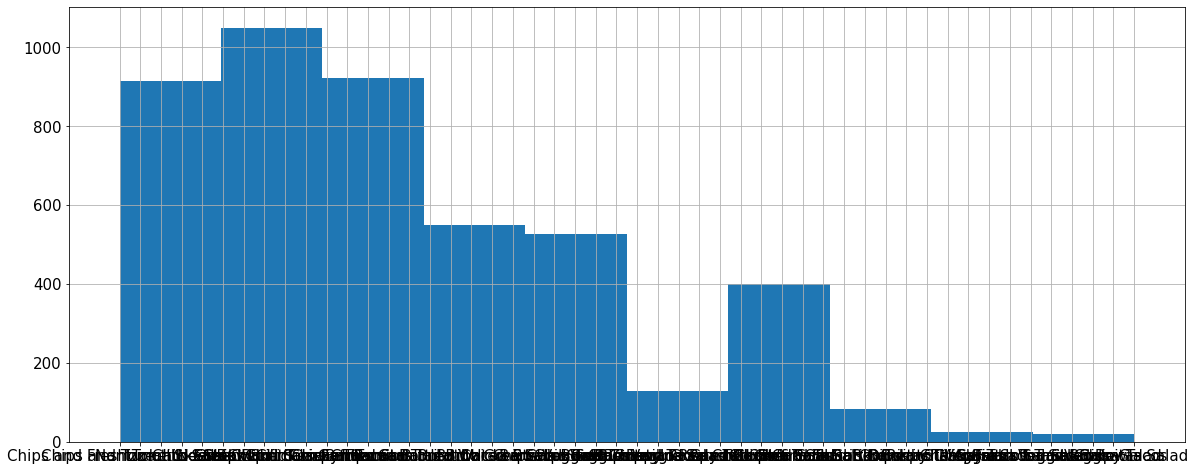

In [34]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 15

h = df['item_name'].hist()
fig = h.get_figure()

In [25]:
items = df.groupby('item_name').quantity.sum().reset_index()
print(items)

                                item_name  quantity
0                       6 Pack Soft Drink        55
1                           Barbacoa Bowl        66
2                        Barbacoa Burrito        91
3                   Barbacoa Crispy Tacos        12
4                     Barbacoa Salad Bowl        10
5                     Barbacoa Soft Tacos        25
6                           Bottled Water       211
7                                    Bowl         4
8                                 Burrito         6
9                             Canned Soda       126
10                      Canned Soft Drink       351
11                          Carnitas Bowl        71
12                       Carnitas Burrito        60
13                  Carnitas Crispy Tacos         8
14                         Carnitas Salad         1
15                    Carnitas Salad Bowl         6
16                    Carnitas Soft Tacos        40
17                           Chicken Bowl       761
18          

In [ ]:
with_and = df[df['item_name'].str.contains(' and ')]
with_and.item_price

0       $2.39 
3       $2.39 
10      $4.45 
14      $4.45 
15      $2.39 
         ...  
4588    $4.45 
4596    $4.45 
4600    $4.45 
4605    $4.45 
4616    $4.45 
Name: item_price, Length: 772, dtype: object

In [ ]:
df.groupby('item_name').quantity.sum()

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.